<a href="https://colab.research.google.com/github/victoriavallejo0/FinalPredictiva/blob/main/Final_EmployeeAttrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Trabajo Final Victoria Vallejo - IBM Employee Attrition

# Librerías

In [320]:
# EDA y Selección variables
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import datetime
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
from datetime import datetime
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif,chi2
from sklearn.feature_selection import f_classif

#Modelos
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier

# Data set

In [321]:
! gdown --id 1MVuZpGmycgiMZg9CIKvEuRLE_R7Ob0sX

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1MVuZpGmycgiMZg9CIKvEuRLE_R7Ob0sX
To: /content/EmployeeAttritionIBM.csv
100% 228k/228k [00:00<00:00, 90.7MB/s]


In [322]:
df = pd.read_csv("EmployeeAttritionIBM.csv")

In [323]:
df.shape

(1470, 35)

In [324]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# Missing Values

In [325]:
def cant_missings (df):
  cant_missing = df.isnull().sum()
  missings = cant_missing.sum()
  return missings

print(cant_missings(df))

0


La base no presenta valores faltantes.

In [326]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

# EDA

In [327]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Employee count es simplemente la cantidad de empleados
EmployeeNumber es el ID por empleado

Son eliminadas

# Variable Target: Attrition

Porcentaje de Attrition de registros en la base

In [328]:
df.Attrition.value_counts()*100/1470

No     83.877551
Yes    16.122449
Name: Attrition, dtype: float64

Cantidad de Attrition

In [329]:
df.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

Text(0.5, 1.0, 'Attrition')

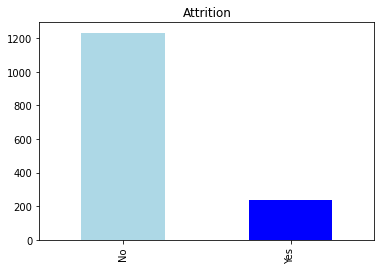

In [330]:
df.Attrition.value_counts().plot(kind="bar", color=colors)
plt.title("Attrition")

La base presenta un 83.9% de no attrited employees, un porcentaje bajo comparado a aquellos attrited employees con un 16.1%. Debido a esto el data set no está balanceado.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f47673fa7f0>,
      dtype=object)

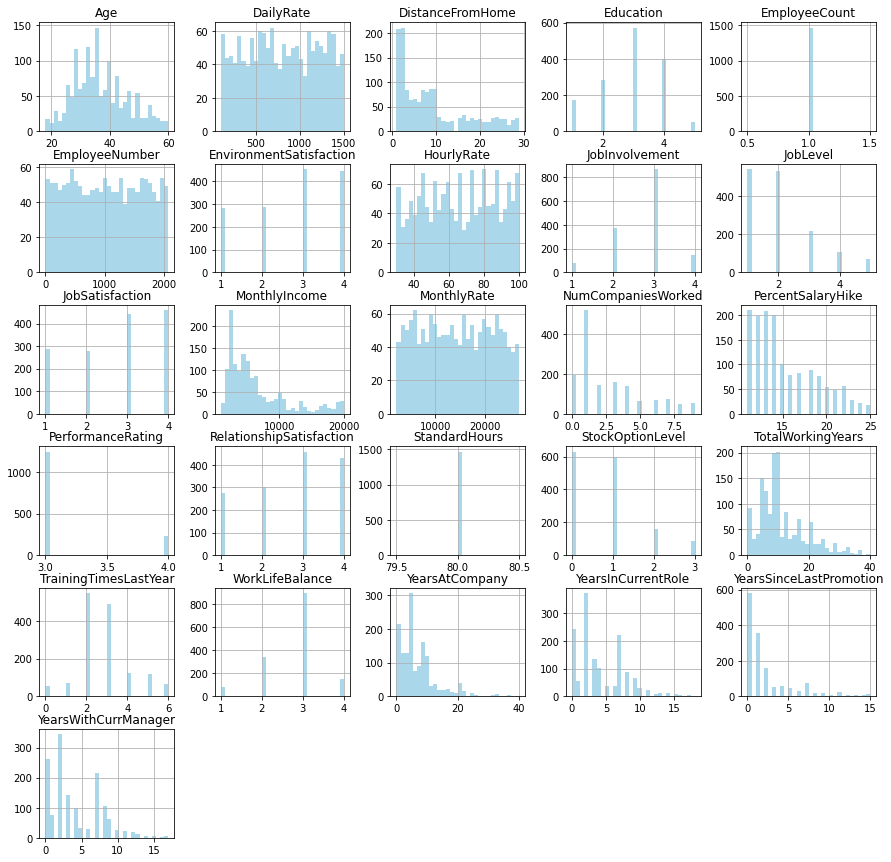

In [331]:
df.hist(bins = 30, figsize = (15,15), color = "#abd7eb")

Es posible observar que aquellas variables que no cambian por empleado son: 
- EmployeeCount
- StandardHours

Por lo tanto, tales variables son eliminadas al no brindar información útil para el análisis

In [332]:
df.Over18.unique()

array(['Y'], dtype=object)

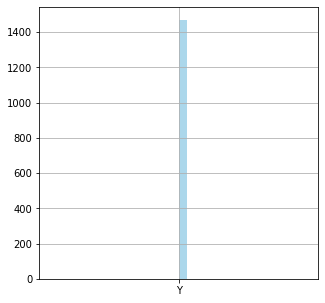

In [333]:
df["Over18"].hist(bins = 30, figsize = (5,5), color = "#abd7eb")

In [334]:
# Copia antes de eliminar variables
df1 = df.copy(deep = True) 

In [335]:
#Copia 2
df2 = df.copy(deep=True)

In [336]:
df.drop (["EmployeeCount","Over18", "StandardHours","EmployeeNumber"], axis=1, inplace=True)

In [337]:
df.shape

(1470, 31)

In [338]:
colors = ["#ADD8E6","#0000FF"]

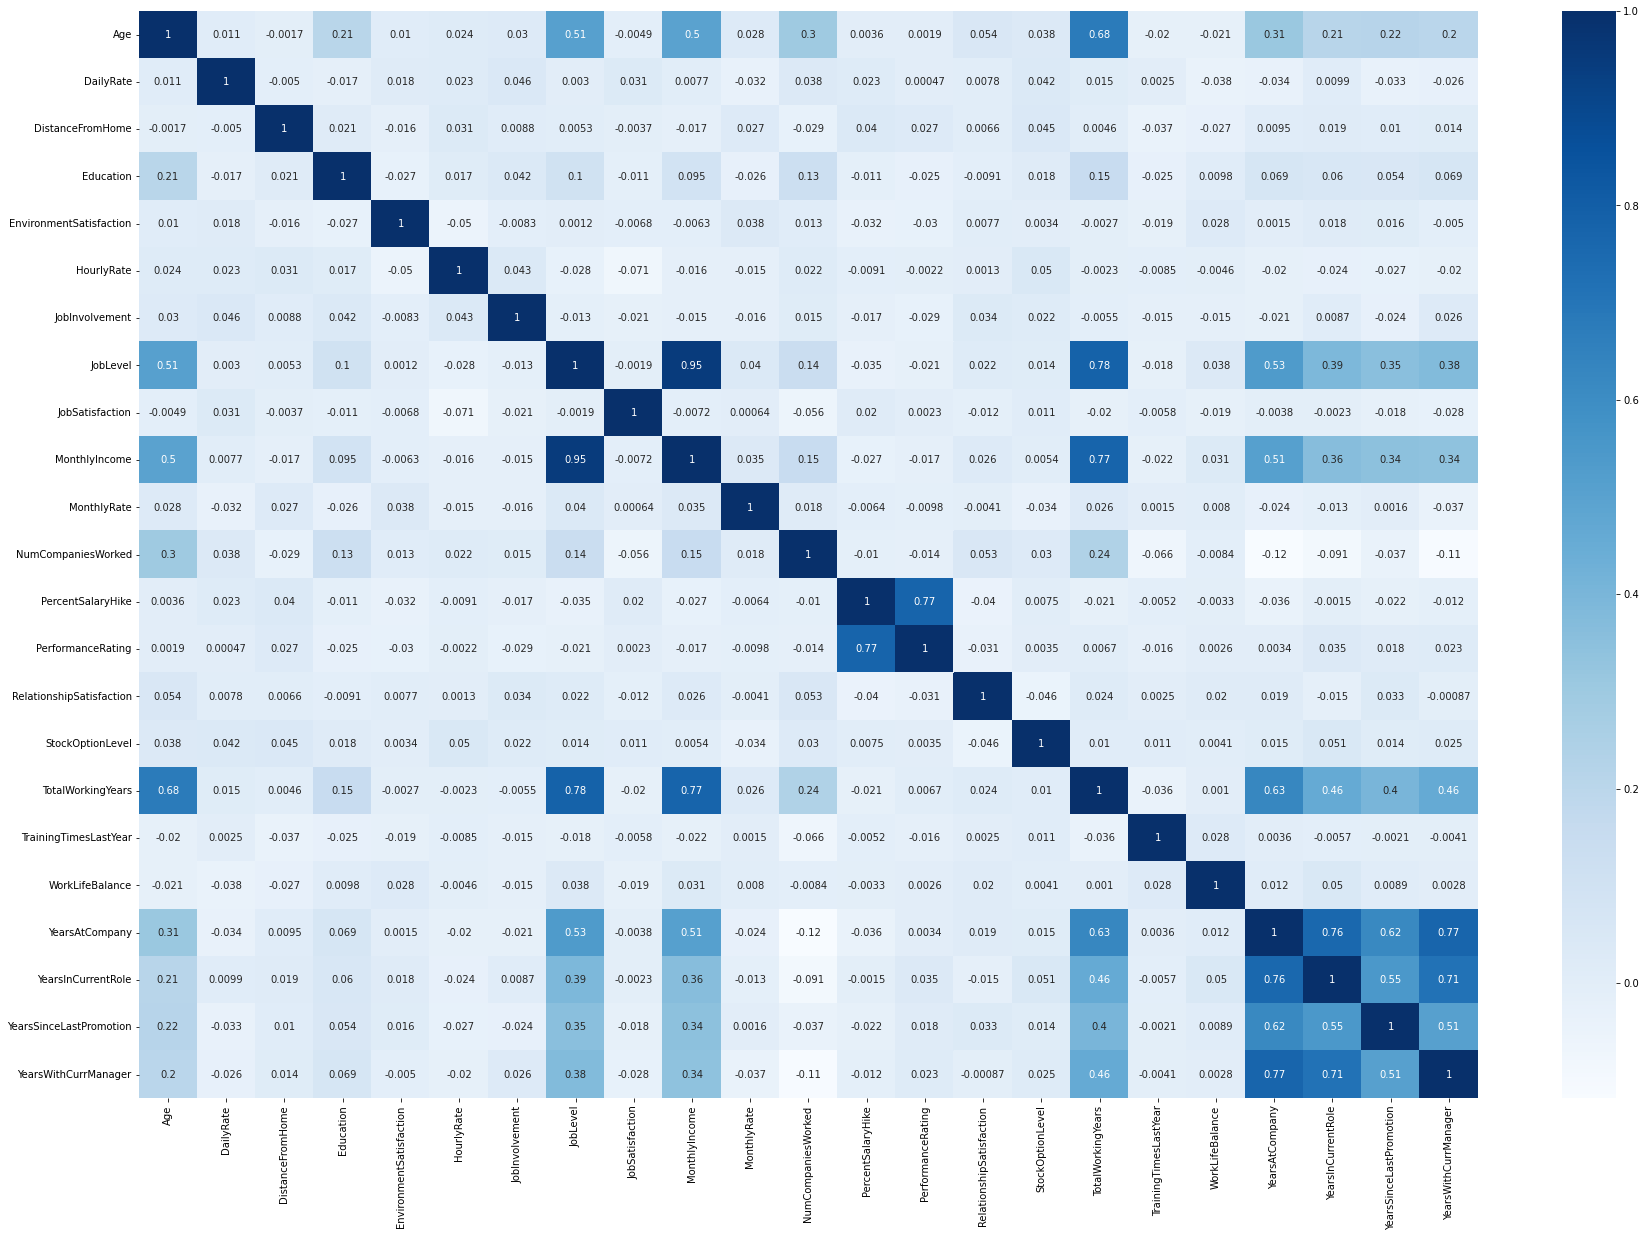

In [339]:
correlations = df.corr()
f, ax = plt.subplots(figsize = (30, 20))
sns.heatmap(correlations, annot = True,cmap="Blues")


In [340]:
df.groupby("Attrition").mean()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,,,,,,,,,,
No,37.561233,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,6832.739659,...,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
Yes,33.607595,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,4787.092827,...,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321


In [341]:
si = df[df["Attrition"] == "Yes"].describe().T
no = df[df["Attrition"] == "No"].describe().T

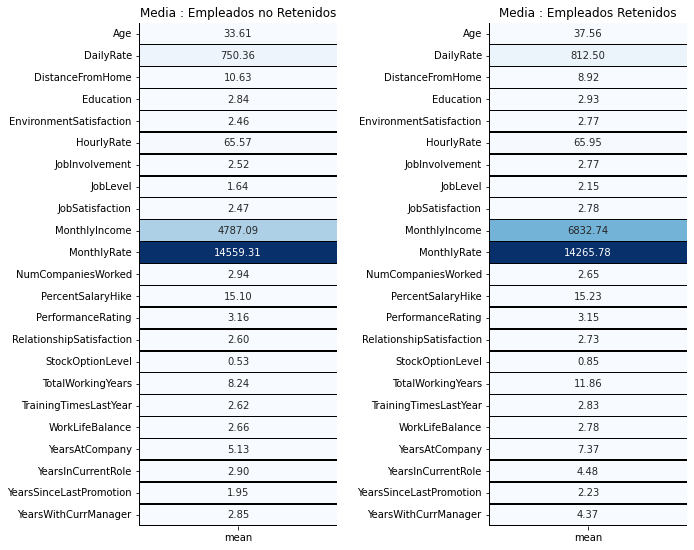

In [342]:
fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (10,8))
plt.subplot(1,2,1)
sns.heatmap(si[["mean"]], annot = True,cmap="Blues",linewidths = 0.4,fmt = ".2f",linecolor = "black",cbar=False)
plt.title("Media : Empleados no Retenidos")
plt.subplot(1,2,2)
sns.heatmap(no[["mean"]],annot = True,cmap = "Blues",linewidths = 0.4,fmt = ".2f",linecolor = "black",cbar=False)
plt.title("Media : Empleados Retenidos")
fig.tight_layout(pad = 2)


Del gráfico se observa:
- La edad promedio de empleados que se van es menor a empleados que se quedan en el empleo.
- La mayor diferencia se observa en MonthlyIncome (Salario) entre retenidos y no retenidos, con una diferencia de un 70% aproximadamente.
- Los empleados que se quedan presentan significativos mayores valores de: DailyRate,  JobLevel, TotalWorkingYears, YearsAtCompany y YearsInCurrentRole

Para que los gráficos tomen labels categóricos de texto paso de la base backup df1 creada anteriormente para luego graficar.

In [343]:
df1['JobSatisfaction']=df1['JobSatisfaction'].replace(1,'Low')
df1['JobSatisfaction']=df1['JobSatisfaction'].replace(2,'Medium')
df1['JobSatisfaction']=df1['JobSatisfaction'].replace(3,'High')
df1['JobSatisfaction']=df1['JobSatisfaction'].replace(4,'Very High')
df1['Education']=df1['Education'].replace(1,'Below College')
df1['Education']=df1['Education'].replace(2,'College')
df1['Education']=df1['Education'].replace(3,'Bachelor')
df1['Education']=df1['Education'].replace(4,'Master')
df1['Education']=df1['Education'].replace(5,'Doctor')

In [344]:
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode
from plotly.subplots import make_subplots
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt
import plotly.express as px
import warnings
fig=px.box(df1,x='JobLevel',y='MonthlyIncome',color='Attrition',template='simple_white',color_discrete_sequence=colors)
fig.update_layout(title_x=0.5,template='simple_white',showlegend=True,title_text="Job Level - Monthly Income Attrition Box Plot")
fig.show()

In [345]:
fig=px.box(df1,x='JobSatisfaction',y='MonthlyIncome',color='Attrition',template='simple_white',color_discrete_sequence=colors)
fig.update_layout(title_x=0.5,template='simple_white',showlegend=True,title_text="Job Satisfaction - Monthly Income Attrition Box Plot")
fig.show()

In [391]:
k=df1.groupby(['JobLevel','Attrition'],as_index=False)['Age'].count()
a=k[k['Attrition']=='Yes']
b=k[k['Attrition']=='No']
a['Age']=a['Age'].apply(lambda x: -x)
k=pd.concat([a,b],ignore_index=True)
k['Count']=k['Age']
k.rename(columns={'JobLevel':'Job Level'},inplace=True)
fig=px.bar(k,x='Job Level',y='Count',color='Attrition',template='simple_white',text='Count',color_discrete_sequence=colors)
fig.update_yaxes(range=[-200,300])
fig.update_traces(marker=dict(line=dict(color='#000000', width=1)),textposition = "outside")
fig.update_layout(title_x=0.5,showlegend=True,template='simple_white',title_text="Attrition basada en Job Levels")
fig.show()

<ipython-input-391-7c8d42a5a443>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [396]:
k=df1.groupby(['YearsWithCurrManager','Attrition'],as_index=False)['Age'].count()
a=k[k['Attrition']=='Yes']
b=k[k['Attrition']=='No']
a['Age']=a['Age'].apply(lambda x: -x)
k=pd.concat([a,b],ignore_index=True)
k['Count']=k['Age']
k.rename(columns={'YearsWithCurrManager':'Years With Current Manager'},inplace=True)
fig=px.bar(k,x='Years With Current Manager',y='Count',color='Attrition',template='simple_white',text='Count',color_discrete_sequence=colors)
fig.update_yaxes(range=[-200,300])
fig.update_traces(marker=dict(line=dict(color='#000000', width=1)),textposition = "outside")
fig.update_layout(title_x=0.5,showlegend=True,template='simple_white',title_text="Attrition basada en Years with current Manager")
fig.show()

<ipython-input-396-df9b24eba3d5>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [291]:
bus=df1.groupby(['JobSatisfaction','Attrition'],as_index=False)['Age'].count()
bus.rename(columns={'Age':'Count'},inplace=True); fig=go.Figure()
fig = make_subplots(rows=1, cols=4, specs=[[{"type": "pie"}, {"type": "pie"},{"type": "pie"}, {"type": "pie"}]],subplot_titles=('Very High', 'High','Medium','Low'))
fig.add_trace(go.Pie(values=bus[bus['JobSatisfaction']=='Very High']['Count'],labels=bus[bus['JobSatisfaction']=='Very High']['Attrition'],hole=0.7,marker_colors=colors,name='Very High',showlegend=False),row=1,col=1)
fig.add_trace(go.Pie(values=bus[bus['JobSatisfaction']=='High']['Count'],labels=bus[bus['JobSatisfaction']=='High']['Attrition'],hole=0.7,marker_colors=colors,name='High',showlegend=False),row=1,col=2)
fig.add_trace(go.Pie(values=bus[bus['JobSatisfaction']=='Medium']['Count'],labels=bus[bus['JobSatisfaction']=='Medium']['Attrition'],hole=0.7,marker_colors=colors,name='Medium',showlegend=False),row=1,col=3)
fig.add_trace(go.Pie(values=bus[bus['JobSatisfaction']=='Low']['Count'],labels=bus[bus['JobSatisfaction']=='Low']['Attrition'],hole=0.7,marker_colors=colors,name='Low',showlegend=True),row=1,col=4)
fig.update_layout(title_x=0.5,template='simple_white',showlegend=True,legend_title_text="Attrition",title_text="Employee Attrition basada en la Satisfacción del Puesto")
fig.update_traces(marker=dict(line=dict(color='#000000', width=1)))

Variables Categóricas y Discretas

In [347]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [349]:
categoricas = ['Attrition', 'BusinessTravel','Department', 'Education', 'EducationField','EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
               'MaritalStatus', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel','WorkLifeBalance']
discretas= ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 
            'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

Label Encoder para las variables categóricas ya que de hacer dummies serían demasiadas variables

In [350]:
le = LabelEncoder()
l1 = []
l2 = []
text_categ = []
print("Transformación encoders:");
for i in tqdm(categoricas):
    if type(df[i][0]) == str:
        text_categ.append(i)
        df[i] = le.fit_transform(df[i])
        l1.append(list(df[i].unique())); l2.append(list(le.inverse_transform(df[i].unique())))
        print(i,' : ',df[i].unique(),' = ',le.inverse_transform(df[i].unique()))

Transformación encoders:


100%|██████████| 17/17 [00:00<00:00, 416.10it/s]

Attrition  :  [1 0]  =  ['Yes' 'No']
BusinessTravel  :  [2 1 0]  =  ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department  :  [2 1 0]  =  ['Sales' 'Research & Development' 'Human Resources']
EducationField  :  [1 4 3 2 5 0]  =  ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender  :  [0 1]  =  ['Female' 'Male']
JobRole  :  [7 6 2 4 0 3 8 5 1]  =  ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus  :  [2 1 0]  =  ['Single' 'Married' 'Divorced']
OverTime  :  [1 0]  =  ['Yes' 'No']


In [351]:
Lcateg = {}
for i in range(len(text_categ)):
    Lcateg[text_categ[i]] = {}
    for j,k in zip(l1[i],l2[i]):
       Lcateg[text_categ[i]][j] = k

print(Lcateg)

{'Attrition': {1: 'Yes', 0: 'No'}, 'BusinessTravel': {2: 'Travel_Rarely', 1: 'Travel_Frequently', 0: 'Non-Travel'}, 'Department': {2: 'Sales', 1: 'Research & Development', 0: 'Human Resources'}, 'EducationField': {1: 'Life Sciences', 4: 'Other', 3: 'Medical', 2: 'Marketing', 5: 'Technical Degree', 0: 'Human Resources'}, 'Gender': {0: 'Female', 1: 'Male'}, 'JobRole': {7: 'Sales Executive', 6: 'Research Scientist', 2: 'Laboratory Technician', 4: 'Manufacturing Director', 0: 'Healthcare Representative', 3: 'Manager', 8: 'Sales Representative', 5: 'Research Director', 1: 'Human Resources'}, 'MaritalStatus': {2: 'Single', 1: 'Married', 0: 'Divorced'}, 'OverTime': {1: 'Yes', 0: 'No'}}


SMOTE (Feature Engineering)
Para balancear la data.

In [352]:
cols = list(df.columns)
cols.remove('Attrition') # Target
over = SMOTE(sampling_strategy = 0.80)
under = RandomUnderSampler(sampling_strategy = 0.1)
Col = df.loc[:,cols]
Lcateg = df.loc[:,'Attrition']
steps = [('over', over)]
pipeline = Pipeline(steps=steps)
Col, Lcateg = pipeline.fit_resample(Col, Lcateg)
Counter(Lcateg)

Counter({1: 986, 0: 1233})

In [353]:
Lcateg.shape

(2219,)

In [354]:
x_train, x_test, y_train, y_test = train_test_split(Col, Lcateg, test_size = 0.20, random_state = 2) # 80 train | 20 test

In [355]:
x_train_test = x_train.copy(deep = True)
x_train_test['Attrition'] = y_train

In [356]:
categoricas.remove('Attrition')

In [357]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif,chi2

   La API Scikit-learn proporciona la clase SelectKBest para extraer las mejores variables de un conjunto de datos determinado de acuerdo con la puntuación más alta de k.

con CHI Q TEST para las variables categóricas

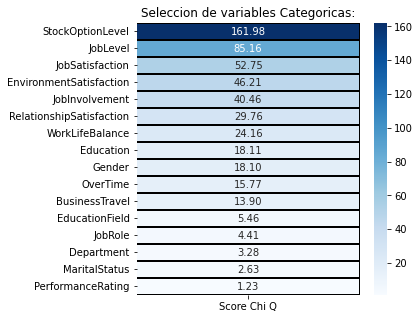

In [360]:
features = x_train.loc[:,categoricas]
target = pd.DataFrame(y_train)
mejoresF = SelectKBest(score_func = chi2,k = 'all')
fit = mejoresF.fit(features,target)
FScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['Score Chi Q']) 
plt.subplots(figsize = (5,5))
sns.heatmap(FScores.sort_values(ascending = False,by = 'Score Chi Q'),annot = True,cmap = "Blues",linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Seleccion de variables Categoricas:');

In [361]:
def chi2_by_hand(df, col1, col2):    
    # tabla de contingencia 
    df_cont = pd.crosstab(index = df[col1], columns = df[col2])
    display(df_cont)
    # calculate degree of freedom
    degree_f = (df_cont.shape[0]-1) * (df_cont.shape[1]-1)
    # suma totales filas y cols
    df_cont.loc[:,'Total']= df_cont.sum(axis=1)
    df_cont.loc['Total']= df_cont.sum()
    print('  Observado  ')
    display(df_cont)
    # esperado
    df_exp = df_cont.copy()    
    df_exp.iloc[:,:] = np.multiply.outer(
        df_cont.sum(1).values,df_cont.sum().values)/df_cont.sum().sum()            
    print('  Esperado  ')
    display(df_exp)
        
    # calculo chi-square
    df_chi2 = ((df_cont - df_exp)**2) / df_exp    
    df_chi2.loc[:,'Total']= df_chi2.sum(axis=1)
    df_chi2.loc['Total']= df_chi2.sum()
    
    print('  Chi-Square  ')
    display(df_chi2)
    # score chi-square
    chi_square_score = df_chi2.iloc[:-1,:-1].sum().sum()
     # calculo p-value
    from scipy import stats
    p = stats.distributions.chi2.sf(chi_square_score, degree_f)

    return chi_square_score, degree_f, p

In [362]:
chi_score, degree_f, p = chi2_by_hand(df,'JobLevel','Attrition')
print(f'Chi2_score: {chi_score}, Degrees of freedom: {degree_f}, p-value: {p}')

Attrition,0,1
JobLevel,,
1,400,143
2,482,52
3,186,32
4,101,5
5,64,5


  Observado  


Attrition,0,1,Total
JobLevel,,,
1,400,143,543
2,482,52,534
3,186,32,218
4,101,5,106
5,64,5,69
Total,1233,237,1470


  Esperado  


Attrition,0,1,Total
JobLevel,,,
1,455.455102,87.544898,543.0
2,447.906122,86.093878,534.0
3,182.853061,35.146939,218.0
4,88.910204,17.089796,106.0
5,57.875510,11.124490,69.0
Total,1233.000000,237.000000,1470.0


  Chi-Square  


Attrition,0,1,Total
JobLevel,,,
1,6.752078,35.127899,41.879977
2,2.595170,13.501454,16.096623
3,0.054159,0.281766,0.335926
4,1.643941,8.552657,10.196599
5,0.648104,3.371784,4.019888
Total,11.693453,60.835560,72.529013


Chi2_score: 72.52901310667391, Degrees of freedom: 4, p-value: 6.634684715458909e-15


- p < 0.05 — las variables están correlacionadas
- p > 0.05 — las variables NO están correlacionadas
Ya que p < 0.05 las variables están correlacionadas

A partir de lo obtenido, elimino las variables: JobRole, Perfonrmance Rating, Marital Status, EducationField, Department, BusinessTravel y Gender

In [363]:
x_train = x_train.drop(columns = ['JobRole', 'PerformanceRating', 'MaritalStatus', 'EducationField', 'Department','BusinessTravel','Gender'])
x_test = x_test.drop(columns = ['JobRole', 'PerformanceRating', 'MaritalStatus', 'EducationField', 'Department','BusinessTravel','Gender'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:1699: FutureWarning:

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1 for `bw_method`, but please see the docs for the new parameters and update your code.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:1699: FutureWarning:

The `bw` parameter is dep

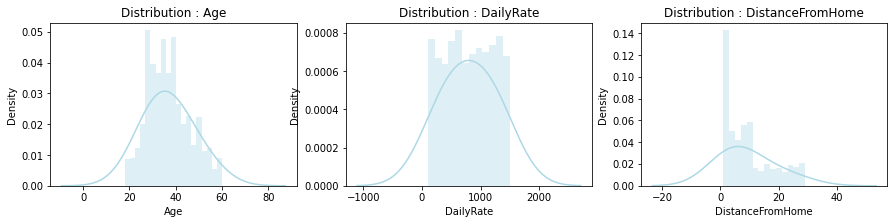

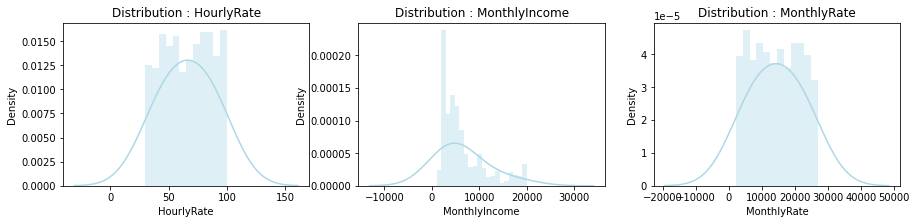

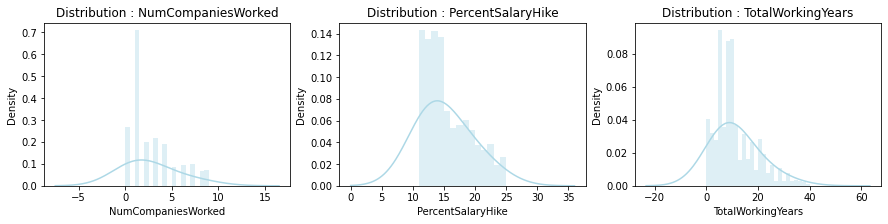

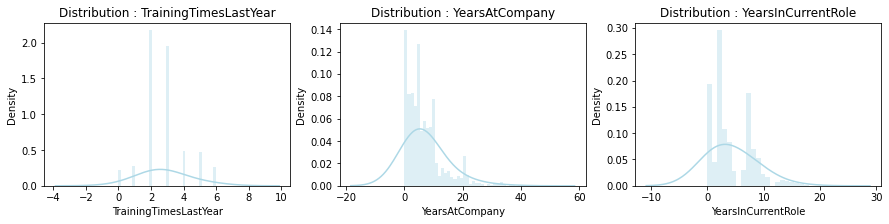

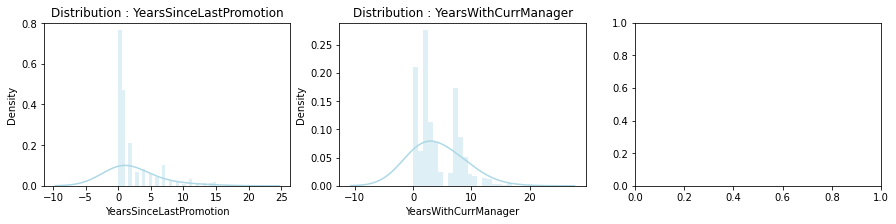

In [397]:
for i in range(5):
    fig, ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,3))
    a = 1
    for j in discretas[(i*3) : (i*3) + 3]:
        plt.subplot(1,3,a) 
        sns.distplot(df1[j],kde_kws = {'bw' : 1},color = colors[0]);
        plt.title('Distribution : ' + j)
        a += 1

Selección de variables Numéricas
Test ANOVA

In [364]:
from sklearn.feature_selection import f_classif

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



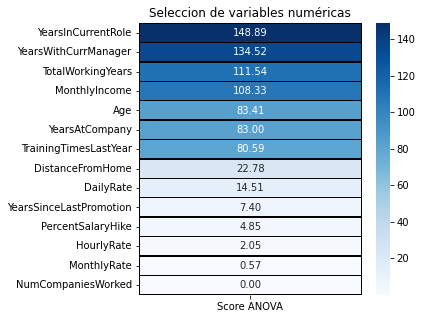

In [365]:
features = x_train.loc[:,discretas]
target = pd.DataFrame(y_train)
mejoresF = SelectKBest(score_func = f_classif,k = 'all')
fit = mejoresF.fit(features,target)
FScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['Score ANOVA']) 
plt.subplots(figsize = (5,5))
sns.heatmap(FScores.sort_values(ascending = False,by = 'Score ANOVA'),annot = True,cmap = "Blues",linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Seleccion de variables numéricas');

A partir de lo obtenido, elimino las variables: NumCompaniesWorked, HourlyRate, MonthlyRate, PercentSalaryHike, YearsSinceLastPromotion, DistanceFromHome, DailyRate

In [366]:
x_train = x_train.drop(columns = ['NumCompaniesWorked', 'HourlyRate','MonthlyRate', 'PercentSalaryHike', 'YearsSinceLastPromotion', 'DistanceFromHome','DailyRate'])
x_test = x_test.drop(columns = ['NumCompaniesWorked', 'HourlyRate','MonthlyRate', 'PercentSalaryHike', 'YearsSinceLastPromotion', 'DistanceFromHome','DailyRate'])

Las variables restantes en Train y Test son:

In [368]:
x_train.columns

Index(['Age', 'Education', 'EnvironmentSatisfaction', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'OverTime',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsWithCurrManager'],
      dtype='object')

### MODELOS

In [369]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve

In [370]:
def modelo (classifier,x_train,y_train,x_test,y_test):
    classifier.fit(x_train,y_train)
    prediction = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,x_train,y_train,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,prediction)))
    plot_roc_curve(classifier, x_test,y_test)
    plt.title('ROC_AUC_Plot')
    plt.show()


In [371]:
def confusionMatrix (classifier,x_test,y_test):
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = colors,fmt ='')

In [372]:
def reporte (classifier,x_test,y_test):
    print(classification_report(y_test,classifier.predict(x_test)))

# DECISION TREE CLASSIFIER

Cross Validation Score :  81.14%
ROC_AUC Score :  77.14%


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.



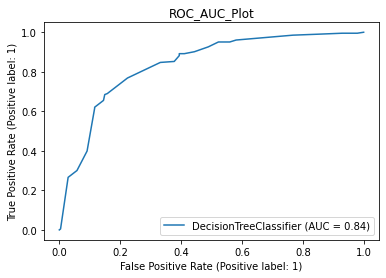

              precision    recall  f1-score   support

           0       0.79      0.78      0.79       241
           1       0.75      0.76      0.75       203

    accuracy                           0.77       444
   macro avg       0.77      0.77      0.77       444
weighted avg       0.77      0.77      0.77       444



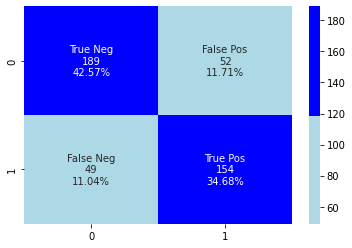

In [388]:
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(random_state = 100,max_depth = 5,min_samples_leaf = 2)
modelo (classifier_dt,x_train.values,y_train.values,x_test.values,y_test.values)
confusionMatrix  (classifier_dt,x_test.values,y_test.values)
reporte (classifier_dt,x_test.values,y_test.values)

# RANDOM FOREST

Cross Validation Score :  86.49%
ROC_AUC Score :  80.85%


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.



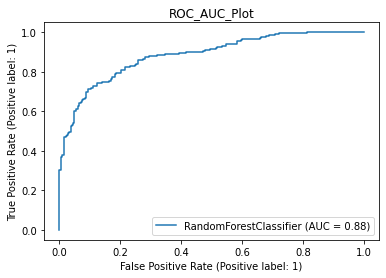

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       241
           1       0.85      0.73      0.78       203

    accuracy                           0.82       444
   macro avg       0.82      0.81      0.81       444
weighted avg       0.82      0.82      0.81       444



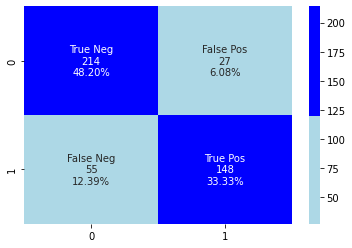

In [389]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(max_depth = 4,random_state = 0)
modelo(classifier_rf,x_train.values,y_train.values,x_test.values,y_test.values)
confusionMatrix  (classifier_rf,x_test.values,y_test.values)
reporte (classifier_rf,x_test.values,y_test.values)

# XGBOOST

Cross Validation Score :  92.41%
ROC_AUC Score :  90.02%


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.



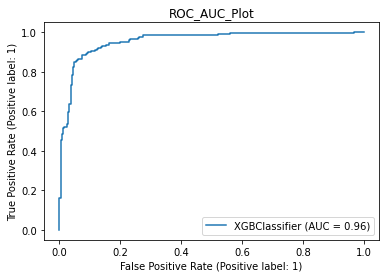

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       241
           1       0.89      0.89      0.89       203

    accuracy                           0.90       444
   macro avg       0.90      0.90      0.90       444
weighted avg       0.90      0.90      0.90       444



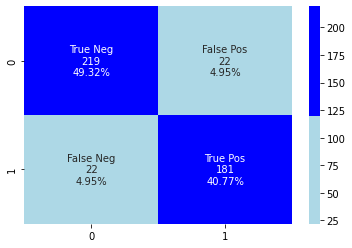

In [390]:
from xgboost import XGBClassifier
classifier_xgb = XGBClassifier(learning_rate= 0.01,max_depth = 3,n_estimators = 3000)
modelo (classifier_xgb,x_train.values,y_train.values,x_test.values,y_test.values)
confusionMatrix  (classifier_xgb,x_test.values,y_test.values)
reporte (classifier_xgb,x_test.values,y_test.values)